In [1]:
!pip install autokeras

     |████████████████████████████████| 166 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 454.3 MB 14 kB/s s eta 0:00:01  |                                | 829 kB 7.7 MB/s eta 0:00:59     |                                | 1.4 MB 7.7 MB/s eta 0:00:59     |▉                               | 11.3 MB 7.7 MB/s eta 0:00:58
     |████████████████████████████████| 4.0 MB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 52.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 35.8 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Succes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autokeras as ak

In [3]:
data = np.load('../input/neutrino/n1000000chi2_0716.npz')

In [4]:
data.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo',
 'chi']

In [5]:
x_train = data['ve_dune'][:10000]
y_train = data['theta13'][:10000]
x_train2 = data['ve_dune'][10000:900000]
y_train2 = data['theta13'][10000:900000]
x_test = data['ve_dune'][900000:]
y_test = data['theta13'][900000:]

In [6]:
clf = ak.StructuredDataRegressor(overwrite=True, max_trials=20)
clf.fit(x_train, y_train,
           validation_split = 0.1,
           batch_size=64,
           epochs=10,
           verbose=1,
           shuffle = True
       )

Trial 20 Complete [00h 00m 09s]
val_loss: 3.319678544998169

Best val_loss So Far: 0.013158116489648819
Total elapsed time: 00h 02m 56s
Epoch 1/10
157/157 [==============================] - 1s 4ms/step - loss: 16.9649 - mean_squared_error: 16.9649
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 4/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 8/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0172 - mean_squa

In [7]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 50)                0         
_________________________________________________________________
normalization (Normalization (None, 50)                101       
_________________________________________________________________
dense (Dense)                (None, 1024)              52224     
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [8]:
model.fit(x_train2, y_train2,
           validation_split = 0.1,
           batch_size=64,
           epochs=10,
           verbose=1,
           shuffle = True
         )

Epoch 1/10
12516/12516 [==============================] - 56s 4ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 2/10
12516/12516 [==============================] - 51s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 3/10
12516/12516 [==============================] - 52s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 4/10
12516/12516 [==============================] - 52s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5/10
12516/12516 [==============================] - 53s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 6/10
12516/12516 [==============================] - 53s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0102 - val_mean_squared_error: 0.010

In [9]:
pre_test = model.predict(x_test)
dif = (y_test - pre_test[:,0])

In [10]:
model.evaluate(x_test, y_test)

3125/3125 [==============================] - 9s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101


[0.010091016069054604, 0.010091016069054604]

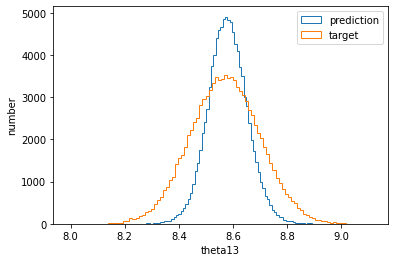

In [17]:
plt.hist(pre_test, histtype = 'step', bins = 100, label = 'prediction')
plt.hist(y_test, histtype = 'step', bins = 100, label = 'target')
plt.xlabel('theta13')
plt.ylabel('number')
plt.legend()
plt.show()

Text(0.5, 1.0, 'theta13')

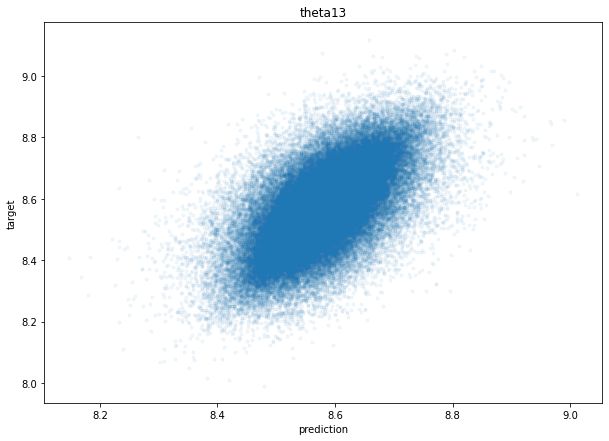

In [18]:
plt.figure(figsize=(10,7))
plt.plot(pre_test, y_test, '.', alpha = 0.05)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('theta13')

In [13]:
model.save('neutrino_on_theta13.h5')

In [15]:
import tensorflow as tf
model1 = tf.keras.models.load_model('neutrino_on_theta13.h5')

In [16]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 50)                0         
_________________________________________________________________
normalization (Normalization (None, 50)                101       
_________________________________________________________________
dense (Dense)                (None, 1024)              52224     
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     